# Practice Case 04 - Foundation of Machine Learning

**Author: Andreas Nugroho R** <br>
**Date: 04 November 2019**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import datetime

#for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import auc, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Load the dataset

In [3]:
df_train = pd.read_csv('training_dataset.csv')
df_train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,2h 54m,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,3h 17m,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

In [7]:
df_train.isnull().sum()

id                                0
number                            0
airline                           0
airline_name                      0
scheduled_departure_time          0
scheduled_arrival_time            5
departure_airport_city            0
departure_airport_code            0
departure_airport_country         0
departure_airport_gate        44209
departure_airport_name            0
departure_airport_region          0
departure_airport_terminal    41340
departure_airport_timezone        0
arrival_airport_city              0
arrival_airport_code              0
arrival_airport_country           0
arrival_airport_gate          98981
arrival_airport_name              0
arrival_airport_region            0
arrival_airport_terminal      58018
arrival_airport_timezone          0
flight_equipment_iata            19
flight_equipment_name            19
flight_duration                   3
delay                             0
dtype: int64

In [9]:
df_train.describe()

,id,delay
count,111068.000000,111068.000000
mean,202365.798475,11.540210
std,149258.072773,26.806913
min,1.000000,0.000000
25%,61496.750000,0.000000
50%,189313.500000,1.000000
75%,329683.250000,13.000000
max,496596.000000,978.000000


Converting departure and arrival time from string to datetime.

In [11]:
df_train['scheduled_departure_time'].unique()

array(['2018-10-05 22:00:00', '2018-10-05 22:05:00',
       '2018-10-05 22:10:00', ..., '2018-11-30 21:25:00',
       '2018-11-30 21:35:00', '2018-11-30 22:40:00'], dtype=object)

In [10]:
df_train['scheduled_departure_time'] = pd.to_datetime(df_train['scheduled_departure_time'], format='%Y-%m-%d %H:%M:%S')

In [11]:
df_train['scheduled_arrival_time'] = pd.to_datetime(df_train['scheduled_arrival_time'], format='%Y-%m-%d %H:%M:%S')

Converting the string in flight_duration to timedelta for convenience.

In [20]:
df_train['flight_duration'].unique()

array(['58m', '1h 55m', '2h 54m', '3h 17m', '59m', '1h 1m', '4h 1m',
       '55m', '2h', '2h 57m', '4h', '3h 39m', '2h 16m', '3h 45m', '2h 6m',
       '2h 37m', '2h 20m', '2h 43m', '2h 25m', '1h 4m', '2h 4m', '1h',
       '6h 11m', '1h 46m', '2h 39m', '2h 27m', '56m', '1h 36m', '1h 22m',
       '1h 43m', '4h 2m', '6h 53m', '1h 7m', '1h 6m', '4h 30m', '3h 53m',
       '2h 49m', '2h 33m', '2h 45m', '1h 34m', '3h 10m', '4h 5m',
       '4h 58m', '2h 44m', '3h 48m', '1h 50m', '2h 3m', '1h 5m', '1h 19m',
       '4h 45m', '2h 40m', '2h 5m', '50m', '3h 37m', '2h 11m', '3h 30m',
       '2h 2m', '5h 45m', '1h 49m', '53m', '3h 54m', '2h 58m', '3h 58m',
       '1h 42m', '5h 15m', '2h 34m', '5h 19m', '2h 35m', '4h 24m',
       '4h 9m', '4h 6m', '3h 5m', '2h 32m', '4h 20m', '1h 48m', '3h 20m',
       '8h 8m', '1h 45m', '1h 53m', '4h 41m', '2h 55m', '1h 28m',
       '2h 42m', '1h 33m', '1h 15m', '4h 40m', '7h 28m', '51m', '5h 4m',
       '6h 45m', '4h 50m', '4h 10m', '2h 21m', '7h 38m', '3h 23m',
   

In [12]:
df_train['flight_duration'] = pd.to_timedelta(df_train['flight_duration'], unit='m')
df_train['flight_duration']

0        00:58:00
1        01:55:00
2        01:55:00
3        02:54:00
4        03:17:00
5        00:59:00
6        01:01:00
7        04:01:00
8        00:55:00
9        02:00:00
10       02:57:00
11       04:00:00
12       03:39:00
13       02:16:00
14       03:45:00
15       02:06:00
16       02:37:00
17       02:20:00
18       02:43:00
19       02:25:00
20       01:04:00
21       02:04:00
22       01:00:00
23       06:11:00
24       01:46:00
25       02:39:00
26       02:04:00
27       02:04:00
28       02:27:00
29       00:56:00
           ...   
111038   00:56:00
111039   00:56:00
111040   00:56:00
111041   00:56:00
111042   00:56:00
111043   01:49:00
111044   01:49:00
111045   02:20:00
111046   01:15:00
111047   01:15:00
111048   01:00:00
111049   01:00:00
111050   01:10:00
111051   01:10:00
111052   01:00:00
111053   01:00:00
111054   01:00:00
111055   01:00:00
111056   01:10:00
111057   01:05:00
111058   01:15:00
111059   01:15:00
111060   00:30:00
111061   00:30:00
111062   0

# Plotting Recommedations

In [32]:
df_train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,00:58:00,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,01:55:00,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,01:55:00,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,02:54:00,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,03:17:00,0


## Based on airline names

In [52]:
df_train['airline_name'].unique()

array(['AirAsia', 'Batik Air', 'Malindo Air', 'Regent Airways',
       'AirAsia X', 'ANA', 'United Airlines', 'Air Canada', 'Emirates',
       'Qatar Airways', 'Malaysia Airlines', 'Lion Air',
       'Garuda Indonesia', 'SilkAir', 'Singapore Airlines',
       'China Southern Airlines', 'Jet Airways (India)',
       'Turkish Airlines', 'Thai Smile', 'Thai Airways International',
       'Philippine Airlines', 'American Airlines', 'Oman Air', 'KLM',
       'SriLankan Airlines', 'Indonesia AirAsia', 'Qantas',
       'Jetstar Asia', 'Xiamen Airlines', 'Virgin Australia',
       'Cathay Pacific', 'Cathay Dragon', 'Air New Zealand', 'Air China',
       'Shenzhen Airlines', 'Bangkok Airways',
       'Myanmar Airways International', 'China Airlines', 'Air India',
       'JAL', 'Scoot', 'Iberia', 'Thai AirAsia', 'Philippines AirAsia',
       'Etihad Airways', 'Air Mauritius', 'Iraqi Airways',
       'Royal Brunei Airlines', 'VietJet Air', 'Lufthansa', 'Finnair',
       'Korean Air', 'Lucky Air',

In [68]:
airline = pd.DataFrame(df_train['airline_name'].value_counts())
airline['percentage'] = airline['airline_name']/len(df_train['airline_name'])
airline

,airline_name,percentage
AirAsia,25437,0.229022
Malaysia Airlines,23198,0.208863
Malindo Air,8374,0.075395
Qatar Airways,5993,0.053958
Emirates,5961,0.053670
Firefly,4468,0.040228
Etihad Airways,2637,0.023742
KLM,2214,0.019934
Philippine Airlines,2193,0.019745
Oman Air,1735,0.015621


In [67]:
#finding the average delay for each airline 
airline_pivot = df_train.pivot_table(index='airline_name', aggfunc={'delay':np.mean})
airline_pivot_sort = airline_pivot.sort_values(('delay'), ascending=True)
airline_pivot_sort

,delay
airline_name,
YTO Cargo,0.000000
Hong Kong Airlines,0.000000
Silk Way West,0.000000
Guangxi Beibu Gulf Airlines,0.000000
Firefly,0.000000
TAP Portugal,1.485714
Raya Airways,3.097744
Jeju Air,3.657143
United Airlines,5.435374


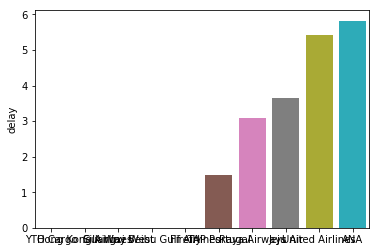

In [79]:
# plotting the top 10 airlines with least number of delays
airline_plot = airline_pivot_sort.head(10)
sns.barplot(x=airline_plot.index.values, y='delay', data=airline_plot)

In [85]:
airline_plot

,delay
airline_name,
YTO Cargo,0.000000
Hong Kong Airlines,0.000000
Silk Way West,0.000000
Guangxi Beibu Gulf Airlines,0.000000
Firefly,0.000000
TAP Portugal,1.485714
Raya Airways,3.097744
Jeju Air,3.657143
United Airlines,5.435374


In [86]:
print(airline.loc['YTO Cargo'])
print(airline.loc['Hong Kong Airlines'])
print(airline.loc['Silk Way West'])
print(airline.loc['Guangxi Beibu Gulf Airlines'])
print(airline.loc['Firefly'])

airline_name    24.000000
percentage       0.000216
Name: YTO Cargo, dtype: float64
airline_name    16.000000
percentage       0.000144
Name: Hong Kong Airlines, dtype: float64
airline_name    14.000000
percentage       0.000126
Name: Silk Way West, dtype: float64
airline_name    36.000000
percentage       0.000324
Name: Guangxi Beibu Gulf Airlines, dtype: float64
airline_name    4468.000000
percentage         0.040228
Name: Firefly, dtype: float64


Based on the chart and the numbers above, it is evident that Firefly is the most recommended airline. It has 0 number of delays and also more common compared to the other airlines with 0 number of delays.

## Based on time of departure

In [87]:
#finding the total number of delays based on time of departure
depart_pivot = df_train.pivot_table(index='scheduled_departure_time', aggfunc={'delay':np.sum})
depart_pivot

,delay
scheduled_departure_time,
2018-10-04 22:00:00,38
2018-10-04 22:05:00,19
2018-10-04 22:10:00,6
2018-10-04 22:15:00,0
2018-10-04 22:20:00,1
2018-10-04 22:25:00,7
2018-10-04 22:30:00,12
2018-10-04 22:35:00,0
2018-10-04 22:40:00,10


In [101]:
print('The earliest departure time is {}'.format(min(df_train['scheduled_departure_time'])))
print('The latest departure time is {}'.format(max(df_train['scheduled_departure_time'])))
depart_pivot.sort_values(by='delay', ascending=True)

The earliest departure time is 2018-10-04 22:00:00
The latest departure time is 2018-11-30 23:55:00


,delay
scheduled_departure_time,
2018-10-30 04:35:00,0
2018-10-24 22:35:00,0
2018-11-18 22:35:00,0
2018-11-18 22:40:00,0
2018-10-24 22:45:00,0
2018-11-18 22:50:00,0
2018-10-24 22:50:00,0
2018-10-24 23:10:00,0
2018-11-06 14:50:00,0


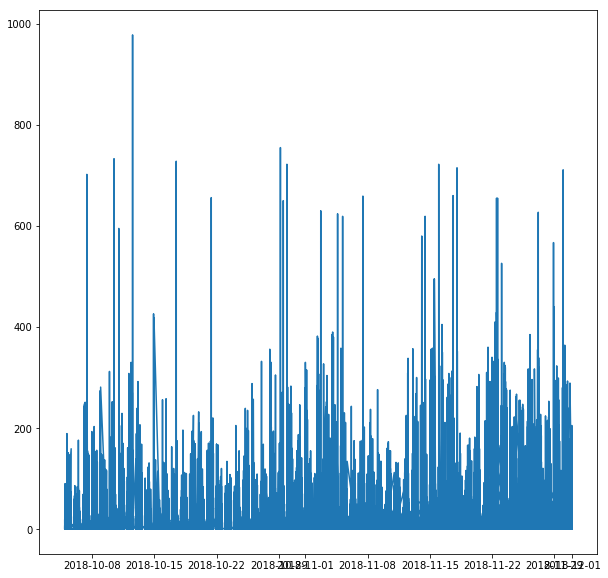

In [110]:
import matplotlib
import datetime

fig = plt.figure(figsize=(10,10))                                                                                                                                                                                                                                                             
ax = fig.add_subplot(111)                                                                                                                                                                                                                                                      

x = df_train['scheduled_departure_time']                                                                                                                                                                                                                                                     
y = df_train['delay']                                                                                                                                                                                                                                                   

ax.plot(x, y)                                                                                                                                                                                                                                                                  

plt.show()

From the graph and the numbers above, the best departure times to avoid delays are usually during the night just before midnight (21:00-01:00) and the next best time is early in the morning for the first flights (05:00-08:00). This makes sense because airports are least busy during these periods and hence can avoid flight delays.

## Based on airports

In [102]:
df_train['departure_airport_name'].unique()

array(['Kuala Lumpur International Airport',
       'Kota Kinabalu International Airport', 'Sandakan Airport',
       'Kudat Airport', 'Miri Airport', 'Labuan Airport',
       'Penang International Airport', 'Kuching International Airport',
       'Bintulu Airport', 'Senai Airport',
       'Sultan Abdul Aziz Shah Airport', 'Langkawi International Airport',
       'Sibu Airport', 'Marudi Airport', 'Sultan Ismail Petra Airport',
       'Lawas Airport'], dtype=object)

In [104]:
airport = pd.DataFrame(df_train['departure_airport_name'].value_counts())
airport['percentage'] = airport['departure_airport_name']/len(df_train['departure_airport_name'])
airport

,departure_airport_name,percentage
Kuala Lumpur International Airport,62530,0.562988
Penang International Airport,11291,0.101658
Kota Kinabalu International Airport,8439,0.075980
Sultan Abdul Aziz Shah Airport,7022,0.063223
Kuching International Airport,5991,0.053940
Senai Airport,4251,0.038274
Langkawi International Airport,3274,0.029477
Miri Airport,3179,0.028622
Sultan Ismail Petra Airport,2585,0.023274
Sibu Airport,1815,0.016341


In [105]:
#finding the average delay for each airport
airport_pivot = df_train.pivot_table(index='departure_airport_name', aggfunc={'delay':np.mean})
airport_pivot_sort = airport_pivot.sort_values(('delay'), ascending=True)
airport_pivot_sort

,delay
departure_airport_name,
Sultan Abdul Aziz Shah Airport,3.419111
Marudi Airport,4.800000
Lawas Airport,6.916667
Sultan Ismail Petra Airport,7.760155
Senai Airport,7.876970
Kudat Airport,8.750000
Kuching International Airport,9.606410
Kota Kinabalu International Airport,9.925584
Penang International Airport,10.607564


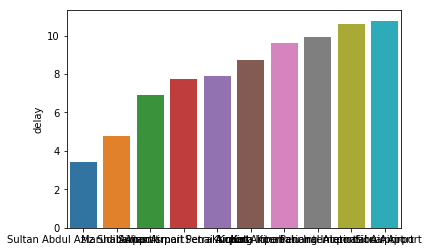

In [106]:
# plotting the top 10 airports with least number of delays
airport_plot = airport_pivot_sort.head(10)
sns.barplot(x=airport_plot.index.values, y='delay', data=airport_plot)

Based on the chart and the numbers above, it is evident that Sultan Abdul Aziz Shah Airport is the airport with the least number of average delays compared to the other airports. It is thus recommended to take a flight in this airport if you are in Malaysia and would like to avoid flight delays.

# Linear Regression

In [13]:
df_train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,00:58:00,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,01:55:00,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,01:55:00,8
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,MY,INT,Sandakan Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,02:54:00,0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,VN,NaN,Noi Bai International Airport,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,03:17:00,0


Creating new variables, depart_time and arrive_time, to categorize scheduled_departure_time and scheduled_arrival_time into early flight, noon flight, evening flight, and late flight.

In [14]:
lst = [df_train]
for column in lst:
    column.loc[(column["scheduled_departure_time"].dt.hour >= 3) & (column["scheduled_departure_time"].dt.hour <= 9), 'depart_time'] = 'early flight'
    column.loc[(column["scheduled_departure_time"].dt.hour > 9) & (column["scheduled_departure_time"].dt.hour <= 15), 'depart_time'] = 'noon flight'
    column.loc[(column["scheduled_departure_time"].dt.hour > 15) & (column["scheduled_departure_time"].dt.hour <= 21), 'depart_time'] = 'evening flight'
    column.loc[(column["scheduled_departure_time"].dt.hour > 21) & (column["scheduled_departure_time"].dt.hour < 3), 'depart_time'] = 'late flight'

In [15]:
lst = [df_train]
for column in lst:
    column.loc[(column["scheduled_arrival_time"].dt.hour >= 3) & (column["scheduled_arrival_time"].dt.hour <= 9), 'arrive_time'] = 'early flight'
    column.loc[(column["scheduled_arrival_time"].dt.hour > 9) & (column["scheduled_arrival_time"].dt.hour <= 15), 'arrive_time'] = 'noon flight'
    column.loc[(column["scheduled_arrival_time"].dt.hour > 15) & (column["scheduled_arrival_time"].dt.hour <= 21), 'arrive_time'] = 'evening flight'
    column.loc[(column["scheduled_arrival_time"].dt.hour > 21) & (column["scheduled_arrival_time"].dt.hour < 3), 'arrive_time'] = 'late flight'

Creating a new variable: duration. This is to categorize flight_duration into short, medium, and long haul flights.

In [16]:
df_train.describe()

,id,flight_duration,delay
count,111068.000000,111065,111068.000000
mean,202365.798475,0 days 02:16:45.103858,11.540210
std,149258.072773,0 days 01:57:40.013760,26.806913
min,1.000000,0 days 00:09:00,0.000000
25%,61496.750000,0 days 01:02:00,0.000000
50%,189313.500000,0 days 01:35:00,1.000000
75%,329683.250000,0 days 02:37:00,13.000000
max,496596.000000,0 days 22:10:00,978.000000


In [17]:
lst = [df_train]
for column in lst:
    column.loc[(column['flight_duration'] / np.timedelta64(1, 'h') >= 0) & (column['flight_duration'] / np.timedelta64(1, 'h') <= 1), 'duration'] = 'short'
    column.loc[(column['flight_duration'] / np.timedelta64(1, 'h') > 1) & (column['flight_duration'] / np.timedelta64(1, 'h') <= 2.5), 'duration'] = 'medium'
    column.loc[column['flight_duration'] / np.timedelta64(1, 'h') > 2.5, 'duration'] = 'long'

In [18]:
df_train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,depart_time,arrive_time,duration
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,00:58:00,2,NaN,NaN,short
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,01:55:00,8,NaN,NaN,medium
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,01:55:00,8,NaN,NaN,medium
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,02:54:00,0,NaN,NaN,long
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,Asia,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,03:17:00,0,NaN,NaN,long


Multinomial linear regression is performed.

In [198]:
df_prepare = copy.deepcopy(df_train)

target = df_prepare['delay']
temp = df_prepare.drop(['delay', 'scheduled_departure_time', 'scheduled_arrival_time', 'flight_duration', 'id', 'number', 'arrival_airport_code', 'departure_airport_code', 'airline'], axis=1)

In [199]:
from sklearn.preprocessing import OneHotEncoder
dataset_dummies = temp.select_dtypes(exclude=['int', 'int64', 'float64'])
dataset_int = temp.select_dtypes(include=['int', 'int64', 'float64'])

In [200]:
dataset_dummies_2 = pd.get_dummies(dataset_dummies, drop_first=True)

In [201]:
df_model = pd.concat([dataset_int, dataset_dummies_2, target], axis=1)

In [202]:
x = df_model.iloc[:,0:len(df_model.columns)-1]
y = df_model.iloc[:,len(df_model.columns)-1]

In [203]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [204]:
mult_regression = LinearRegression()
mult_regression.fit(x_train, y_train)

y_pred_train = mult_regression.predict(x_train)
y_pred_test = mult_regression.predict(x_test)

print('MSE test = {}'.format(mean_squared_error(y_pred_test, y_test)))
print('MSE train = {}'.format(mean_squared_error(y_pred_train, y_train)))

MSE test = 1.0045347269446448e+21
MSE train = 620.8136548890359


In [196]:
import statsmodels.api as sm

In [205]:
result = sm.OLS(y_train, x_train).fit()
result.summary()

D:\Anaconda\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delay   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     16.09
Date:                Mon, 04 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:43:13   Log-Likelihood:            -4.1179e+05
No. Observations:               88854   AIC:                         8.251e+05
Df Residuals:                   88070   BIC:                         8.325e+05
Df Model:                         783                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
airline_name_ANA                                                            -9.9279     17.969     -0.552      0.581     -45.148      25.292
airline_name_Air Astana                                                      0.9383      1.190      0.788      0.430      -1.394       3.271
airline_name_Air Canada                                                    -10.3161     17.882     -0.577      0.564     -45.364      24.732
airline_name_Air China                                                       4.5401     18.136      0.250      0.802     -31.006      40.086
airline_name_Air France                                                    -10.2650     17.874     -0.574      0.566     -45.298      24.768
airline_name_Air India                                                      -7.8863     17.921     -0.440      0.660     -43.010      27.238
airline_name_Air Mauritius                                                  -9.2689     17.802     -0.521      0.603     -44.161      25.623
airline_name_Air New Zealand                                                -4.6528     17.786     -0.262      0.794     -39.514      30.209
airline_name_Air Seoul                                                      -4.4804     19.084     -0.235      0.814     -41.885      32.924
airline_name_Air Seychelles                                                -15.2001     18.379     -0.827      0.408     -51.223      20.823
airline_name_AirAsia                                                        -4.1456     17.778     -0.233      0.816     -38.990      30.699
airline_name_AirAsia X                                                     -20.8187     18.395     -1.132      0.258     -56.872      15.235
airline_name_Alitalia                                                      -14.0224     18.274     -0.767      0.443     -49.840      21.795
airline_name_American Airlines                                              -7.3268     17.803     -0.412      0.681     -42.221      27.568
airline_name_Asiana Airlines                                                -8.2253     19.215     -0.428      0.669     -45.887      29.436
airline_name_Austrian                                                      -12.8158     18.235     -0.703      0.482     -48.557      22.925
airline_name_Bangkok Airways                                                -7.1471     17.804     -0.401      0.688     -42.043      27.749
airline_name_Batik Air                                                      -3.0032     17.834     -0.168      0.866     -37.958      31.952
airline_name_Biman Bangladesh Airlines                                      32.7648     18.506      1.770      0.077      

# Logistic Regression

Create target variable: delay of more than 1 hour and delay of less than 1 hour

In [19]:
lst = [df_train]
for column in lst:
    column.loc[(column['delay'] >= 0) & (column['delay'] <= 1), 'delay_1h'] = 0
    column.loc[column['delay'] > 1, 'delay_1h'] = 1

In [20]:
df_train.head()

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,depart_time,arrive_time,duration,delay_1h
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,00:58:00,2,NaN,NaN,short,1.0
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,01:55:00,8,NaN,NaN,medium,1.0
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,01:55:00,8,NaN,NaN,medium,1.0
3,4,AK5198,AK,AirAsia,2018-10-05 22:05:00,2018-10-06 01:00:00,Kuala Lumpur,KUL,MY,J9,...,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,02:54:00,0,NaN,NaN,long,0.0
4,5,AK516,AK,AirAsia,2018-10-05 22:10:00,2018-10-06 01:25:00,Kuala Lumpur,KUL,MY,P1,...,T2,Asia/Ho_Chi_Minh,32S,Airbus A318 / A319 / A320 / A321,03:17:00,0,NaN,NaN,long,0.0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [22]:
df_prepare = copy.deepcopy(df_train)

target = df_prepare['delay_1h']
temp = df_prepare.drop(['delay_1h', 'scheduled_departure_time', 'scheduled_arrival_time', 'flight_duration', 'id', 'number', 'arrival_airport_code', 'departure_airport_code', 'airline'], axis=1)

dataset_dummies = temp.select_dtypes(exclude=['int', 'int64', 'float64'])
dataset_int = temp.select_dtypes(include=['int', 'int64', 'float64'])

dataset_dummies_2 = pd.get_dummies(dataset_dummies, drop_first=True)
df_model = pd.concat([dataset_int, dataset_dummies_2, target], axis=1)

In [23]:
x = df_model.iloc[:,0:len(df_model.columns)-1]
y = df_model.iloc[:,len(df_model.columns)-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

log_regression = LogisticRegression()
log_regression.fit(x_train, y_train)

y_pred_train = log_regression.predict(x_train)
y_pred_test = log_regression.predict(x_test)

print('MSE test = {}'.format(mean_squared_error(y_pred_test, y_test)))
print('MSE train = {}'.format(mean_squared_error(y_pred_train, y_train)))

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MSE test = 0.03628342486720086
MSE train = 0.03098341098881311


In [24]:
from sklearn.metrics import auc, confusion_matrix
from sklearn import metrics

In [25]:
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[45850    34]
 [ 2719 40251]]


In [26]:
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[11423     8]
 [  798  9985]]


In [27]:
fpr_train, tpr_train, threshold = metrics.roc_curve(y_train, y_pred_train)
fpr_test, tpr_test, threshold = metrics.roc_curve(y_test, y_pred_test)

In [28]:
print('AUC train = {}'.format(metrics.auc(fpr_train, tpr_train)))
print('AUC test = {}'.format(metrics.auc(fpr_test, tpr_test)))

AUC train = 0.9679911481406289
AUC test = 0.9626473849406695


In [29]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97     11431
         1.0       1.00      0.93      0.96     10783

    accuracy                           0.96     22214
   macro avg       0.97      0.96      0.96     22214
weighted avg       0.97      0.96      0.96     22214



In [30]:
report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     45884
         1.0       1.00      0.94      0.97     42970

    accuracy                           0.97     88854
   macro avg       0.97      0.97      0.97     88854
weighted avg       0.97      0.97      0.97     88854



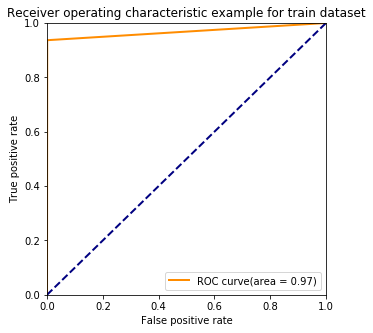

In [31]:
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr_train, tpr_train, color='darkorange',
        lw=lw, label='ROC curve(area = %0.2f)' % metrics.auc(fpr_train, tpr_train))
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic example for train dataset')
plt.legend(loc='lower right')
plt.show()

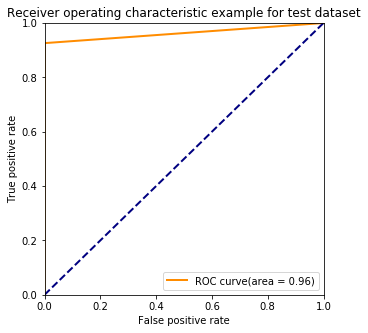

In [32]:
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange',
        lw=lw, label='ROC curve(area = %0.2f)' % metrics.auc(fpr_test, tpr_test))
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic example for test dataset')
plt.legend(loc='lower right')
plt.show()